# Timbre Clustering with NMF

In this section we will discuss separating a mixture using specific timbral cues. Non-negative matrix factorization (NMF) is a popular way to isolate sounds by decomposing a spectrogram into two matrices: one that represents a set of specific frequency spectra and an other that represents when each of those spectra are "on" or "activated".

## Non-Negative Matrix Factorization (NMF)

Non-negative matrix factorization aka NMF is an unsupervised machine learning approach that finds recurring patterns and figures out how to combine them to explain data. 



A good way to think about NMF is like mixing colors together. Let's for example, start with a bright red color and now overlay that with a blue color and then a green color. So we know the three colors that go into this. 


So let's express it as a sort of equation. It'll be the mixed color on the left-that's what we're trying to get-which is equal to one times red plus one times blue plus one times green. All colors can be expressed as a weighted combination of red, green, and blue.

### Visualizing color-space

We can express colors with this equation, "something" $\times$ red $+$ "something" $\times$ blue $+$ "something" $\times$ green. The trick to expressing any color is to figure out what those "somethings" are.

Let's get a more geometric perspective on what color space looks like. If we were to draw it on a 3D axis, it looks something like this. On one axis would be how much red there is. On another is how much blue there is. And on this last one is how much green there is. Every point in this 3D space represents a unique color that is expressed as a combination of our three base colors. Let's formalize the math a little bit. So first let's normalize each axis. So that it's between zero and one with one being as red as it gets, for example, or as green as it gets.

So that means the color red is at the point [1, 0, 0]. Green is at [0, 1, 0] and blue is at [0, 0, 1]. So let's take this color at this point in space. It's representation in this space is 0.2 0.8 and 0.5, let's say. So to put this back in terms of our equation from before you could express the color as it's equal to 0.2 times the red vector, which we write as [1, 0, 0] plus 0.8 times the green vector plus 0.5 times the blue vector.

### Adding some matrix math

As a final step, let's convert this notation to using matrix vector notation, recall that in matrix vector notation, you multiply each element of the row by each element of the column, then sum. The matrix on the left is a one by three matrix. And the next one's a three by three matrix with each column representing one of our base colors.

The last one is our one by three result, which was at 0.2 0.8 0.5. So far, we have factorized a single color into a product of two matrices. This is called matrix factorization. The benefit of this notation is clear when you consider that we can quickly apply it to explaining even more colors. Let's show it for reconstructing five colors. The first matrix becomes five by three. The second stays at three by three, and the last one becomes five by three. 

### Abstracting away the colors
Okay, so this is pretty simple. And maybe even sounds like we're just reinventing the wheel. So let's make a little more complex. First, we'll abstract away the colors and express everything in terms of just matrices, which we'll call $X$, $H$ and $W$.

$X$ represents the data. The shape of it is $F \times N$ where $N$ is the number of data points, and $F$ is the number of features for each data point. $W$ represents the things that you're combining. In the color example, this was the vectors representing red, green, and blue. It has shape $F$ by $D$. Finally $H$ represents how you're combining the things in $W$ like when we said a color was this much red, that much green and this much blue.

It has shape $D \times N$. When you do matrix multiplication of $W$ and $H$, you end up with an $F \times N$ matrix, the same shape as $X$. This equation factorizes $X$ into two matrices $W$ and $H$. One more thing to note the elements within $W$ and $H$ are strictly non-negative. That is, no elements are below zero. After all the concept of a negative color doesn't really make sense. This is the non-negative in non-negative matrix factorization. 

### Optimizing for W and H
So the color example was easy. We already know that red, green and blue can make any color. But what if you don't know what things to combine to reconstruct your data? That is to say, given only $X$, how do you figure out what $W$ and $H$ should be?

This is the sort of classic problem in machine learning. Find $W$ and $H$ such that the difference between the product of $W$ and $H$ and the actual data $X$ is low. The classic algorithm for NMF is to use what's called multiplicative updates. I'll give the gist of how it works, but for more details, the original paper by Lee and Seung is worth a careful read.

First initialize $W$ and $H$ to random non-negative values, then update $W$ and $H$ according to these update equations, which are derived by solving the optimization problem we posed before. The key thing to keep in mind is that we are discovering $W$ and $H$ simultaneously directly from $X$ in the end. Every data point in $X$ will be expressed as a linear non-negative combination of things in $W$.

### Application to audio source separation
To get some intuition. Let's look at an application. We'll be applying NMF to separate audio sources in a complex auditory scene. First, a quick overview of how audio works. I want you to listen to the following auditory scene and think about what you're hearing. How many sources are there? What are the sources?

Now let's look at how we represent audio in a machine. Sound consists of pressure waves that excite our eardrums, which pass electrical signals to our auditory cortex. We experienced this as hearing a microphone does something very similar. What you're looking at here is a waveform or a time series representation of the audio, the bigger the peak, the more the microphone is excited by the sound wave reaching it. This is a handy first representation of audio and one that you may already be familiar with. There's another representation of audio called the time frequency representation in a time frequency representation, the loudness of every frequency from low to high is shown over time.
What you're looking at here is a time frequency representation also called a spectrogram of my voice talking right now. Here are some claps and some whistling.

It's maybe apparent by looking at the spectrogram that there are recurring patterns. For example, claps look like vertical lines, whereas whistles are horizontal lines. So how can we use NMF to discover the building blocks of the auditory scene. After that, how do we interpret NMF to figure out when different sources are active in that auditory scene?

Finally, how can we use the output of NMF to separate sources in an auditory scene? Let's first consider a simple auditory scene. It consists of two simple sources, claps and whistling. Here's what it sounds like along with the time frequency representation.

Let's apply NMF to this auditory scene to see what happens. So the time frequency representation is our data $X$. We you're going to break it up into a $W$ and $H$ matrix that when multiplied, reconstruct $X$. We'll use the update equations shown earlier to learn $W$ and $H$. First, we need to pick the main hyper parameter for NMF - the dimensionality of $W$ and $H$ recall that $X$ is $F$ by $N$ if we make $W F$ by 100 and $H$ 100 by $F$, then we're saying that $X$ is made up of a hundred building blocks that can be combined in different ways that maybe seems a little high so let's try something lower, like two. Okay, let's run NMF here's what the code looks like using nussl, an audio source separation library. Now that we've run it, let's examine what NMF learned. First. Let's look at the W matrix, here called templates. We see it learned two spectral templates, which we can plot.

One template is strong at all frequencies while the other one has a harmonic pattern to it. The harmonic one corresponds to the whistle while the other one corresponds to clapping. Now let's look at the $H$ matrix here called activations, $H$ tells us how to use the building blocks in $W$ to reconstruct each time step of $X$, the time frequency representation.

We can see that when there's clapping in $X$, the clap template is active, and where there's whistling, the whistling template is active. Finally, let's get rid of the clapping by zeroing out the corresponding row of $H$. Bam! Audio source separation via NMF.


## Clustering By NMF Spectral Templates

A big problem with NMF is that it _over_ separates in a sense. For instance, if you want three sources from a mix, you might need 50-100 teplates in your $W$ matrix. Therefore we need a way to collect the 50-100 templates of $W$ into clusters corresponding to our three sources.

There are many ways to do this, but one simple way that we'll look at here is clustering $W$ templates by Mel-Frequency Cepstral Coefficients (MFCCs). The key idea here is to reduce the dimensionality of the frequency templates to a reasonable number of dimensions and run a k-Means clustering algorithm on those MFCC templates to find which ones belong to which sources.

Here's our audio file again:

In [6]:
# Do our imports
import nussl
import matplotlib.pyplot as plt
import time

Matching file found at /Users/ethanmanilow/.nussl/audio/historyrepeating_7olLrex.wav, skipping download.


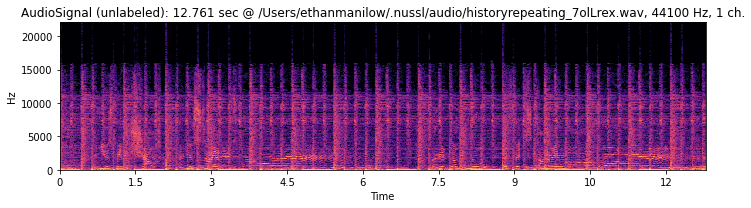

In [3]:
audio_path = nussl.efz_utils.download_audio_file('historyrepeating_7olLrex.wav')
history = nussl.AudioSignal(audio_path)
history.embed_audio()

plt.figure(figsize=(10, 3))
nussl.utils.visualize_spectrogram(history)
plt.title(str(history))
plt.tight_layout()
plt.show()

Let's use the `TimbreClustering` algorithm, which uses NMF under the hood:

In [4]:
tmbr_clusters = nussl.separation.primitive.TimbreClustering(history, num_sources=2, n_components=50)

Let's run the timbre clustering for 200 iterations see the output: 

In [8]:
# Run Timber clusering (i.e., NMF)
estimates = tmbr_clusters.run()

/Users/ethanmanilow/opt/anaconda3/envs/ismir2020-tutorial/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [9]:
estimates